In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [6]:
conn = sqlite3.connect('sakila.db')
pd.read_sql('SELECT * FROM rental;', conn).head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2019-04-11 18:11:49
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2019-04-11 18:11:49
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2019-04-11 18:11:49
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2019-04-11 18:11:49
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2019-04-11 18:11:49


In [5]:
pd.read_sql('SELECT * FROM customer;', conn).head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2019-04-11 18:11:49


In [7]:
pd.read_sql('SELECT * FROM inventory;', conn).head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2019-04-11 18:11:48
1,2,1,1,2019-04-11 18:11:48
2,3,1,1,2019-04-11 18:11:48
3,4,1,1,2019-04-11 18:11:48
4,5,1,2,2019-04-11 18:11:48


In [8]:
pd.read_sql('SELECT * FROM store;', conn).head()

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2019-04-11 18:11:48
1,2,2,2,2019-04-11 18:11:48


In [9]:
pd.read_sql('SELECT * FROM address;', conn).head()

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2019-04-11 18:11:48
1,2,28 MySQL Boulevard,None,,576,None,,2019-04-11 18:11:48
2,3,23 Workhaven Lane,None,,300,None,,2019-04-11 18:11:48
3,4,1411 Lillydale Drive,None,,576,None,,2019-04-11 18:11:48
4,5,1913 Hanoi Way,None,,463,35200,,2019-04-11 18:11:48


In [11]:
pd.read_sql('SELECT * FROM city;', conn).head()

,city_id,city,country_id,last_update
0,1,A Corua (La Corua),87,2019-04-11 18:11:48
1,2,Abha,82,2019-04-11 18:11:48
2,3,Abu Dhabi,101,2019-04-11 18:11:48
3,4,Acua,60,2019-04-11 18:11:48
4,5,Adana,97,2019-04-11 18:11:48


In [12]:
pd.read_sql('SELECT * FROM film;', conn).head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2019-04-11 18:11:48
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2019-04-11 18:11:48
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2019-04-11 18:11:48
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2019-04-11 18:11:48
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2019-04-11 18:11:48


In [102]:
df = pd.read_sql('''SELECT 
                 rental.rental_id, rental.rental_date, rental.return_date,
                 customer.last_name AS customer_lastname,
                 store.store_id,
                 city.city AS rental_store_city,
                 film.title AS film_title, film.rental_duration AS film_rental_duration,
                 film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
                 film.rating AS film_rating
                 FROM rental
                 INNER JOIN customer ON rental.customer_id == customer.customer_id
                 INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
                 INNER JOIN store ON inventory.store_id == store.store_id
                 INNER JOIN address ON store.address_id == address.address_id
                 INNER JOIN city ON address.city_id == city.city_id
                 INNER JOIN film ON inventory.film_id == film.film_id;''',
                 conn, index_col='rental_id', 
                 parse_dates=['rental_date', 'return_date'])
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [103]:
df.shape

(16044, 10)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [105]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


# **Numerical analysis and visualization**

## **film_rental_rate**

In [106]:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [107]:
df['film_rental_rate'].mean()

2.9426302667663933

In [108]:
df['film_rental_rate'].median()

2.99

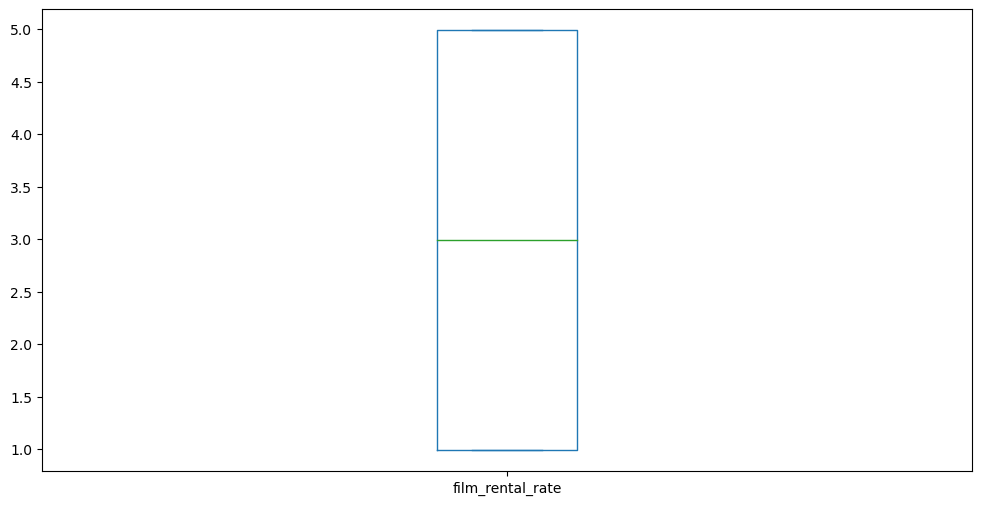

In [109]:
df['film_rental_rate'].plot(kind='box', figsize=(12, 6));

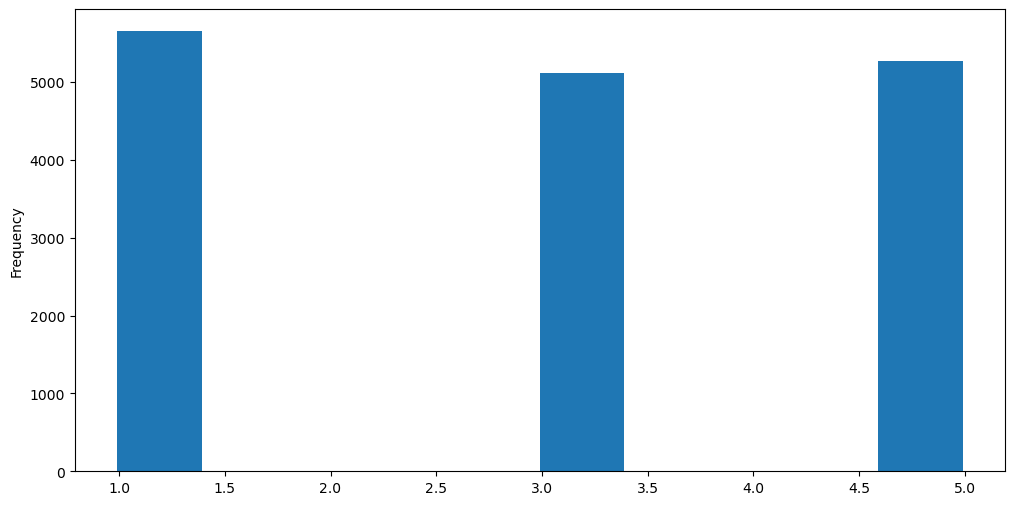

In [110]:
df['film_rental_rate'].plot(kind='hist', figsize=(12, 6));

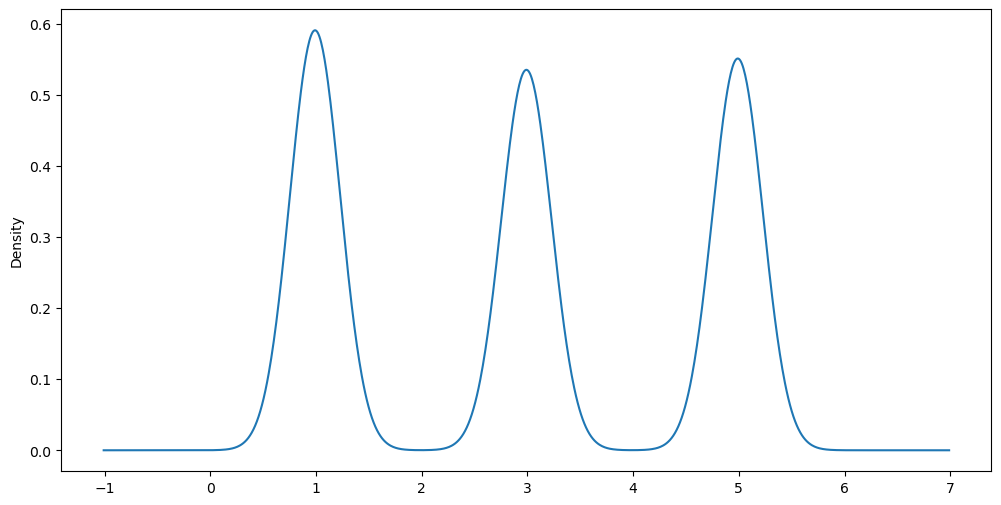

In [111]:
df['film_rental_rate'].plot(kind='density', figsize=(12, 6));

# **Categorical analysis and visualization**

## **rental_store_city**

In [112]:
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

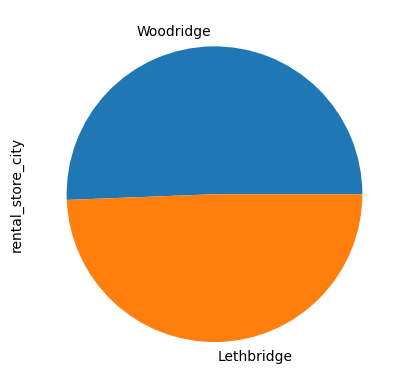

In [113]:
df['rental_store_city'].value_counts().plot(kind='pie');

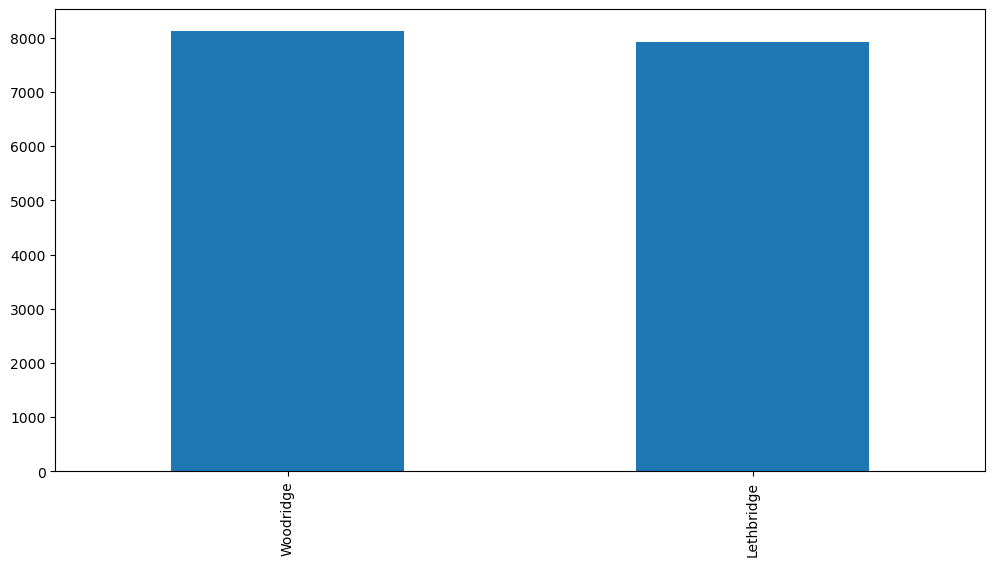

In [114]:
df['rental_store_city'].value_counts().plot(kind='bar', figsize=(12, 6));

# **Column wrangling**

## **rental_rate_return**

In [115]:
df['rental_gain_return'] = df['film_rental_rate']/df['film_replacement_cost']*100
df['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

In [116]:
df['rental_gain_return'].describe()

count    16044.000000
mean        16.343824
std         11.405159
min          3.301100
25%          6.191370
50%         13.597090
75%         23.017706
max         49.949950
Name: rental_gain_return, dtype: float64

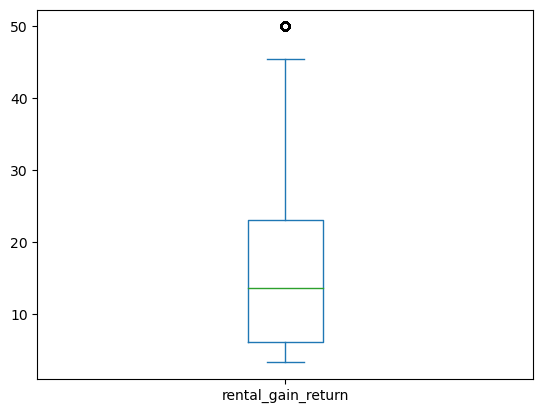

In [117]:
df['rental_gain_return'].plot(kind='box');

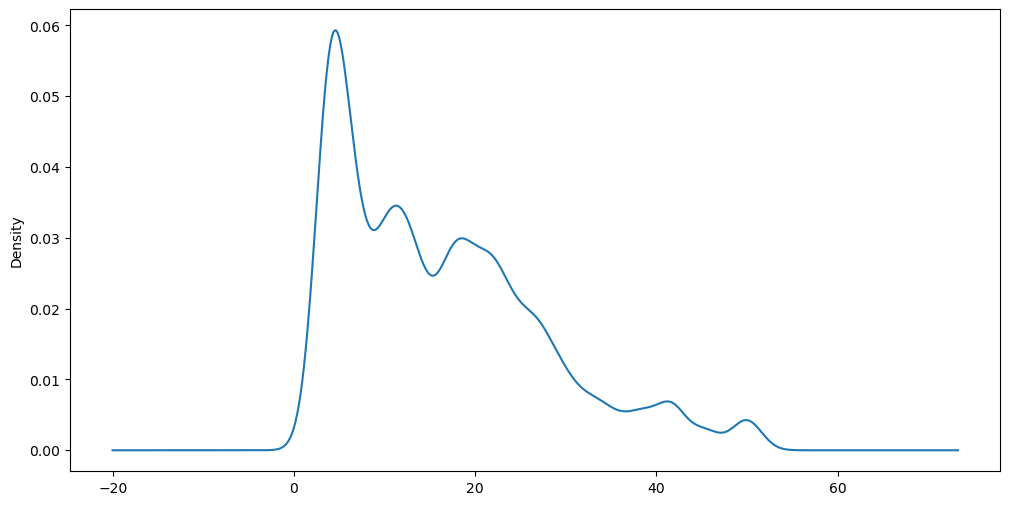

In [118]:
df['rental_gain_return'].plot(kind='density', figsize=(12, 6));

In [119]:
df['rental_gain_return'].mean().round(2)

16.34

In [120]:
round(df['rental_gain_return'].median(), 2)

13.6

Each rental represents 13.6% of film cost. 7.35 rentals are necessary to recover film market price. The average number of times each film is rented out (16.74) exceeds the number of rentals required to recover the replacement cost (7.35).

In [121]:
round(100/13.6, 2)

7.35

In [122]:
df['film_title'].value_counts().mean().round(2)

16.75

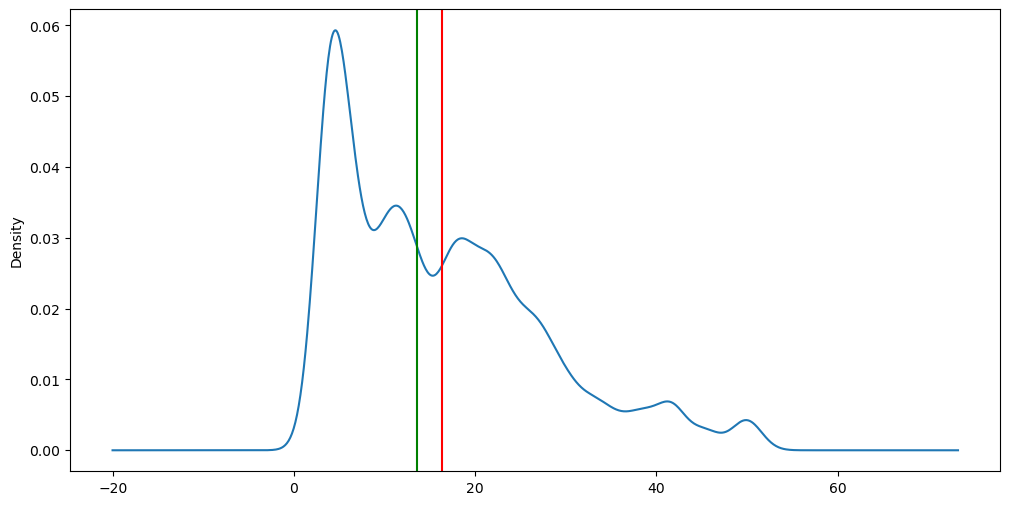

In [123]:
ax = df['rental_gain_return'].plot(kind='density', figsize=(12, 6))
ax.axvline(df['rental_gain_return'].mean(), color='red')
ax.axvline(df['rental_gain_return'].median(), color='green');

# **Selection & Indexing**

## **Get the rental records of the customer with lastname HANSEN**

In [124]:
df.loc[df['customer_lastname']=='HANSEN']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


## **Create a list of all the films with the highest replacement cost**

In [125]:
df.sort_values('film_replacement_cost', ascending=False)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
3855,2005-07-06 17:03:48,2005-07-12 14:32:48,CAMPBELL,2,Woodridge,OSCAR GOLD,7,2.99,29.99,PG,9.96999
3785,2005-07-06 14:00:13,2005-07-14 10:13:13,MALCOLM,1,Lethbridge,REIGN GENTLEMEN,3,2.99,29.99,PG-13,9.96999
6632,2005-07-12 09:33:10,2005-07-15 11:36:10,BUSTAMANTE,1,Lethbridge,OSCAR GOLD,7,2.99,29.99,PG,9.96999
12989,2005-08-19 07:19:04,2005-08-21 10:58:04,KOWALSKI,1,Lethbridge,OSCAR GOLD,7,2.99,29.99,PG,9.96999
12992,2005-08-19 07:23:06,2005-08-23 06:11:06,DUGGAN,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,3.30110
...,...,...,...,...,...,...,...,...,...,...,...
2293,2005-06-18 07:45:03,2005-06-24 08:12:03,SNYDER,1,Lethbridge,PURPLE MOVIE,4,2.99,9.99,R,29.92993
1882,2005-06-17 03:17:21,2005-06-19 22:23:21,PARKER,1,Lethbridge,FELLOWSHIP AUTUMN,6,4.99,9.99,NC-17,49.94995
6990,2005-07-27 01:02:46,2005-07-31 00:22:46,RICE,1,Lethbridge,THEORY MERMAID,5,0.99,9.99,PG-13,9.90991


In [126]:
df.loc[df['film_replacement_cost']==df['film_replacement_cost'].max(), 'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

## **How many PG or PG-13 rating films were rented?**

In [127]:
df.loc[(df['film_rating']=='PG')|(df['film_rating']=='PG-13')].shape[0]

6797

## **What's the mean of film_rental_duration?**

In [128]:
df['film_rental_duration'].mean()

4.935489902767389

## **What's the most common rental duration?**

In [129]:
df['film_rental_duration'].value_counts().head(1)

3    3412
Name: film_rental_duration, dtype: int64

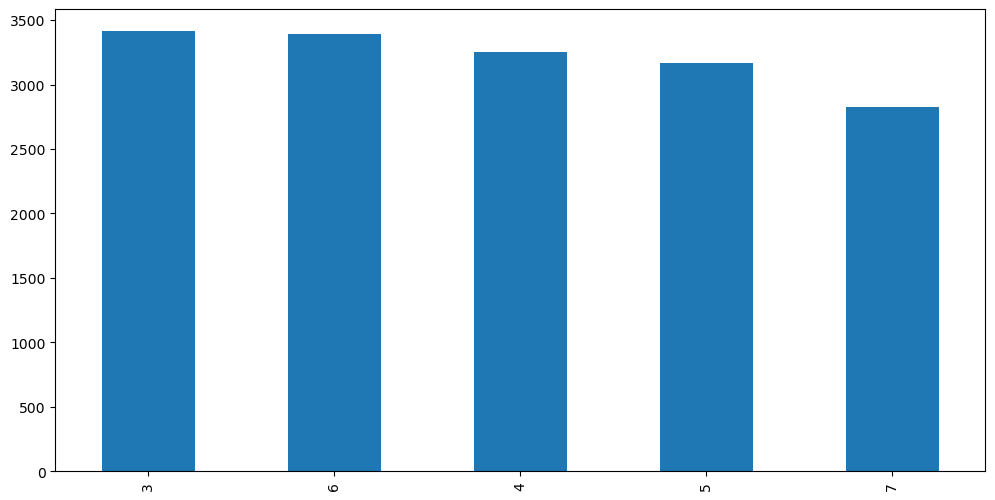

In [130]:
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(12, 6));

## **What is the most common rental rate?**

In [131]:
df['film_rental_rate'].value_counts().head(1)

0.99    5652
Name: film_rental_rate, dtype: int64

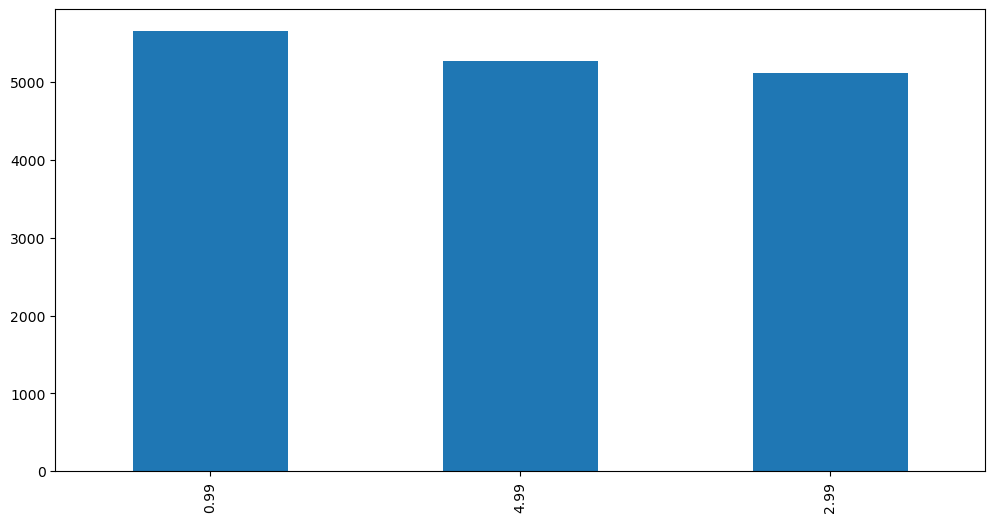

In [132]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(12, 6));

## **How is the replacement cost distributed?**


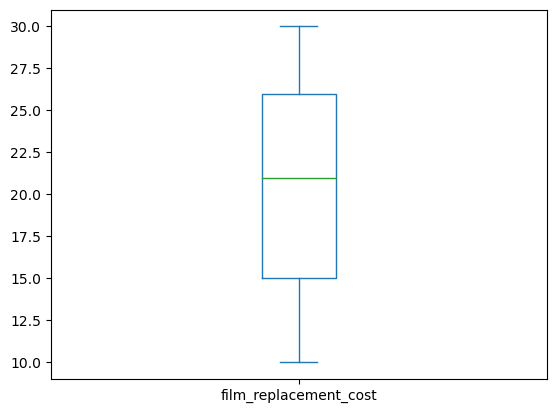

In [133]:
df['film_replacement_cost'].plot(kind='box');

In [134]:
df['film_replacement_cost'].mean()

20.21544253303416

In [135]:
df['film_replacement_cost'].median()

20.99

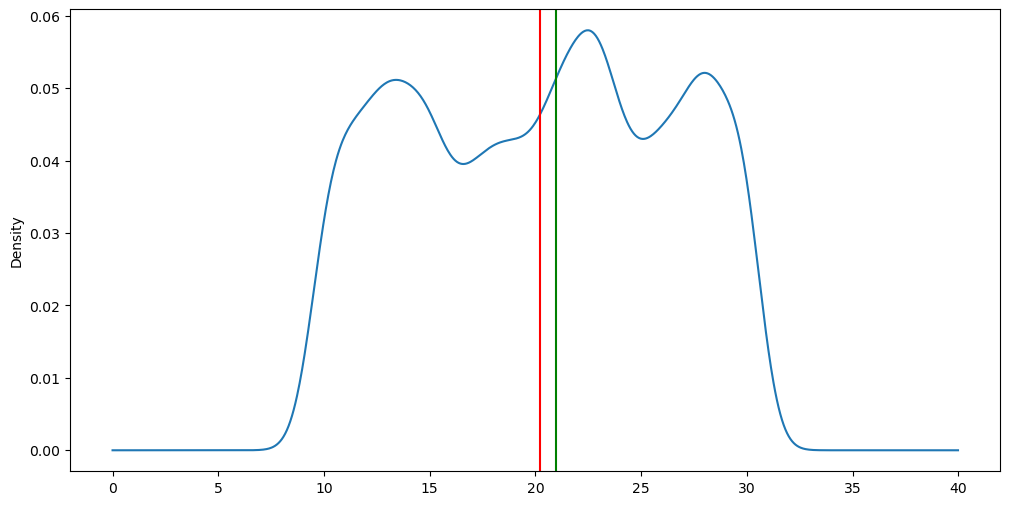

In [136]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(12, 6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green');

## **How many films of each rating do we have?**

In [137]:
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

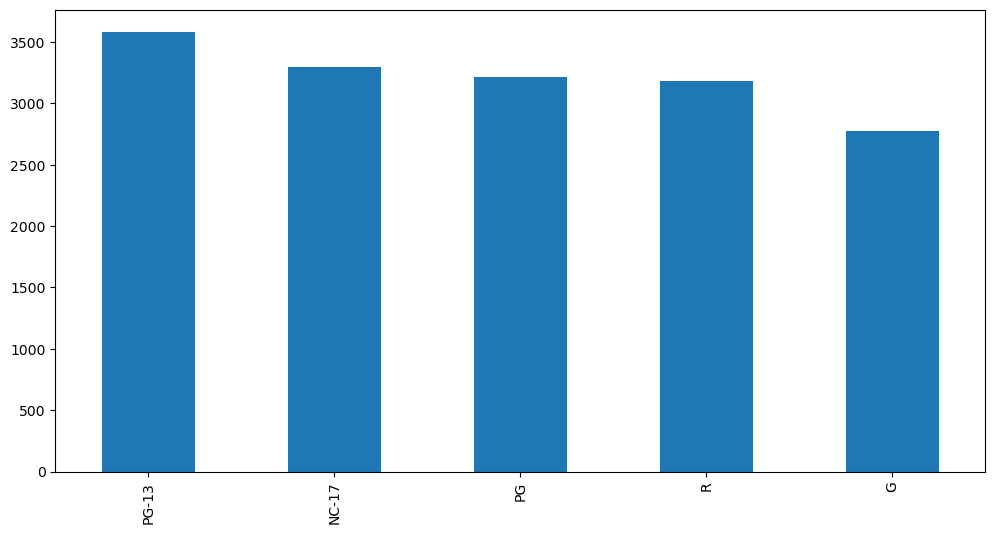

In [138]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(12, 6));

## **Does the film replacement cost vary depending on film rating?**

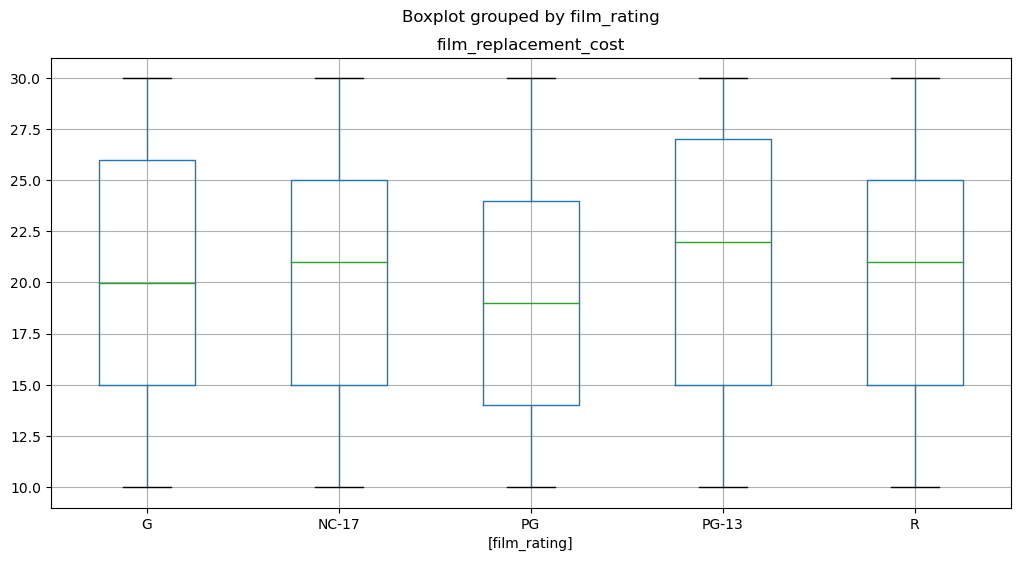

In [139]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(12, 6));

## **Add and calculate a new rental_days column**

In [140]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990


In [142]:
df['rental_days'] = df['return_date'] - df['rental_date']
df['rental_days'].head()

rental_id
1   1 days 23:11:00
2   3 days 20:46:00
3   7 days 23:09:00
4   9 days 02:39:00
5   8 days 05:28:00
Name: rental_days, dtype: timedelta64[ns]

In [144]:
df['rental_days'] = df[['return_date', 'rental_date']].apply(lambda x: (x[0]-x[1]).days, axis=1)
df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

## **Analyze the distribution of rental_days**

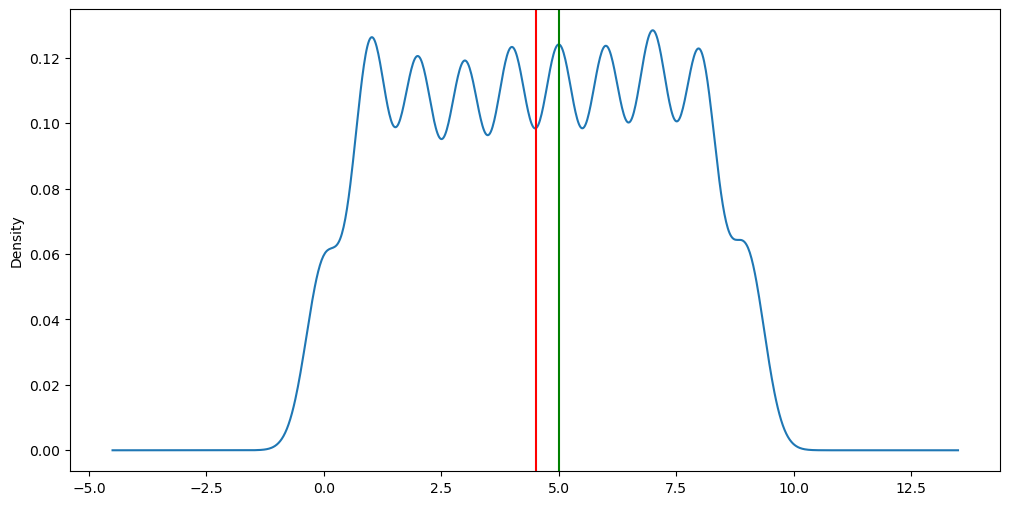

In [146]:
ax = df['rental_days'].plot(kind='density', figsize=(12, 6))
ax.axvline(df['rental_days'].mean(), color='red')
ax.axvline(df['rental_days'].median(), color='green');

## **Add and calculate a new film_daily_rental_rate column**

In [147]:
df['film_daily_rental_rate'] = df['film_rental_rate']/df['film_rental_duration']
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

## **Analyze the distribution of film_daily_rental_rate**

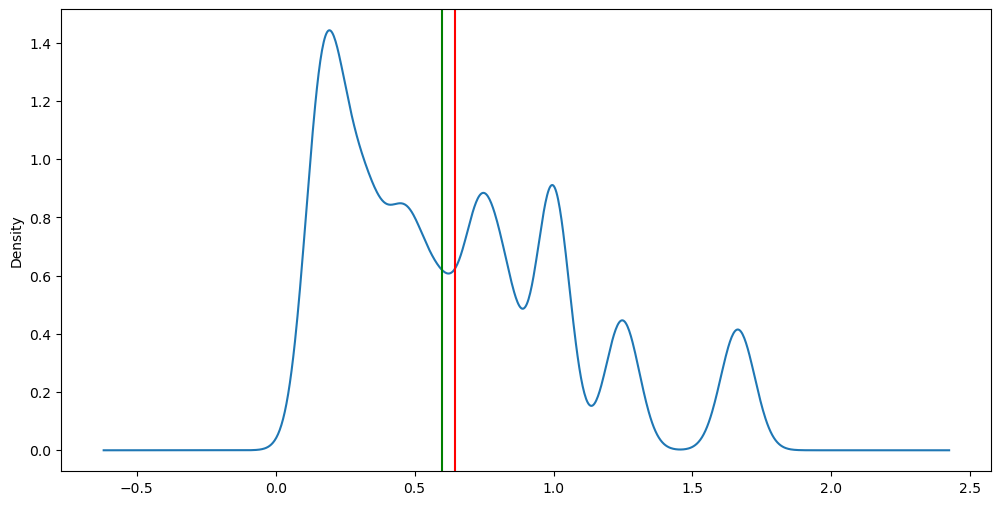

In [148]:
ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(12, 6))
ax.axvline(df['film_daily_rental_rate'].mean(), color='red')
ax.axvline(df['film_daily_rental_rate'].median(), color='green');

## **List 10 films with the lowest daily rental rate**

In [152]:
df.loc[df['film_daily_rental_rate']==df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,3.414971,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.306220,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,3.536977,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,6.604403,1.0,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,3.301100,9.0,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,9.909910,3.0,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,9.909910,6.0,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.306220,4.0,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.191370,6.0,0.141429


## **List 10 films with the highest daily rental rate**

In [153]:
df.loc[df['film_daily_rental_rate']==df['film_daily_rental_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,19.967987,5.0,1.663333
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,21.705089,2.0,1.663333
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,19.199692,6.0,1.663333
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,19.967987,9.0,1.663333
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,17.827796,0.0,1.663333
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,19.967987,4.0,1.663333
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,27.737632,8.0,1.663333
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,17.827796,8.0,1.663333
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,23.773225,5.0,1.663333


## **How many rentals were made in Lethbridge city?**

In [155]:
df.loc[df['rental_store_city']=='Lethbridge'].shape[0]

7923

## **How many rentals of each film rating were made in Lethbridge city?**

In [156]:
df.loc[df['rental_store_city']=='Lethbridge', 'film_rating'].value_counts()

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64

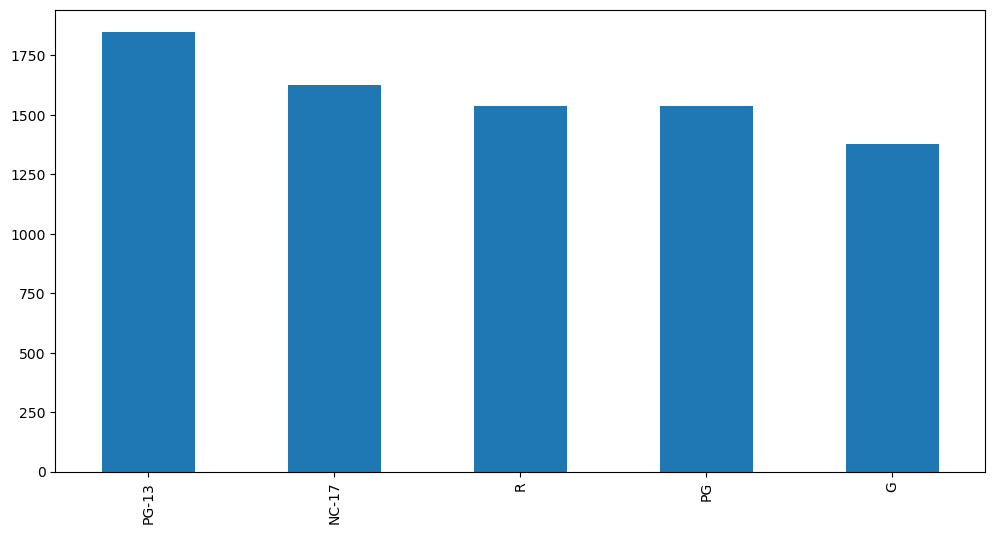

In [157]:
df.loc[df['rental_store_city']=='Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(12, 6));

## **How many rentals were made in Woodridge city with rental duration higher than 5 days?**

In [159]:
df.loc[(df['rental_store_city']=='Woodridge')&(df['film_rental_duration']>5)].shape[0]

3186

## **How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?**

In [160]:
df.loc[(df['store_id']==2)&(df['film_replacement_cost']<10.99)].shape[0]

361